In [20]:
from medmnist import OrganMNIST3D
import torch
import numpy as np
from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from tqdm import tqdm


from medical_fl.model import GenericCNN
from medical_fl.data import load_data_niid

In [6]:
class ToTensor:
    def __call__(self, x):
        return torch.from_numpy(x).float()

In [16]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
epochs = 50

In [72]:
net = GenericCNN().to(device)
criterion = CrossEntropyLoss()
optimizer = Adam(net.parameters(), lr=1e-4)

In [19]:
trainloader, valloader, testloader = load_data_niid(partition_id=0, num_partitions=1, transforms=ToTensor())

In [73]:
val_losses = []
train_losses = []
train_accuracy = []
val_accuracy = []

for i in range(epochs):
    print(f"Epoca: {i+1}/{epochs}")
    net.train()
    batch_losses = []
    batch_acc = []
    hits = []
    total = 0
    for x, y in tqdm(trainloader):
        optimizer.zero_grad()
        x, y = x.to(device).float(), y.to(device).long()
        y = y.squeeze()
        output = net(x)
        loss = criterion(output, y)
        batch_losses.append(loss.item())
        loss.backward()
        optimizer.step()
        batch_acc.append(len(torch.where(torch.argmax(output, dim=1) == y)[0]) / len(output))
    train_accuracy.append(np.mean(batch_acc))
    train_losses.append(np.mean(batch_losses))
    with torch.no_grad():
        net.eval()
        batch_losses = []
        batch_acc = []
        for x, y in valloader:
            x, y = x.to(device).float(), y.to(device).long()
            y = y.squeeze()
            output = net(x)
            loss = criterion(output, y)
            batch_losses.append(loss.item())
            batch_acc.append(len(torch.where(torch.argmax(output, dim=1) == y)[0]) / len(output))
        val_losses.append(np.mean(batch_losses))
        val_accuracy.append(np.mean(batch_acc))
            


Epoca: 1/50


100%|██████████| 31/31 [00:00<00:00, 37.53it/s]


Epoca: 2/50


100%|██████████| 31/31 [00:00<00:00, 37.16it/s]


Epoca: 3/50


100%|██████████| 31/31 [00:00<00:00, 37.66it/s]


Epoca: 4/50


100%|██████████| 31/31 [00:00<00:00, 37.86it/s]


Epoca: 5/50


100%|██████████| 31/31 [00:00<00:00, 37.93it/s]


Epoca: 6/50


100%|██████████| 31/31 [00:00<00:00, 37.88it/s]


Epoca: 7/50


100%|██████████| 31/31 [00:00<00:00, 37.58it/s]


Epoca: 8/50


100%|██████████| 31/31 [00:00<00:00, 37.87it/s]


Epoca: 9/50


100%|██████████| 31/31 [00:00<00:00, 37.84it/s]


Epoca: 10/50


100%|██████████| 31/31 [00:00<00:00, 37.83it/s]


Epoca: 11/50


100%|██████████| 31/31 [00:00<00:00, 37.89it/s]


Epoca: 12/50


100%|██████████| 31/31 [00:00<00:00, 37.94it/s]


Epoca: 13/50


100%|██████████| 31/31 [00:00<00:00, 37.65it/s]


Epoca: 14/50


100%|██████████| 31/31 [00:00<00:00, 37.83it/s]


Epoca: 15/50


100%|██████████| 31/31 [00:00<00:00, 38.14it/s]


Epoca: 16/50


100%|██████████| 31/31 [00:00<00:00, 38.36it/s]


Epoca: 17/50


100%|██████████| 31/31 [00:00<00:00, 38.06it/s]


Epoca: 18/50


100%|██████████| 31/31 [00:00<00:00, 38.21it/s]


Epoca: 19/50


100%|██████████| 31/31 [00:00<00:00, 37.97it/s]


Epoca: 20/50


100%|██████████| 31/31 [00:00<00:00, 38.58it/s]


Epoca: 21/50


100%|██████████| 31/31 [00:00<00:00, 38.20it/s]


Epoca: 22/50


100%|██████████| 31/31 [00:00<00:00, 38.46it/s]


Epoca: 23/50


100%|██████████| 31/31 [00:00<00:00, 38.27it/s]


Epoca: 24/50


100%|██████████| 31/31 [00:00<00:00, 38.01it/s]


Epoca: 25/50


100%|██████████| 31/31 [00:00<00:00, 38.05it/s]


Epoca: 26/50


100%|██████████| 31/31 [00:00<00:00, 38.08it/s]


Epoca: 27/50


100%|██████████| 31/31 [00:00<00:00, 38.01it/s]


Epoca: 28/50


100%|██████████| 31/31 [00:00<00:00, 38.10it/s]


Epoca: 29/50


100%|██████████| 31/31 [00:00<00:00, 38.18it/s]


Epoca: 30/50


100%|██████████| 31/31 [00:00<00:00, 38.05it/s]


Epoca: 31/50


100%|██████████| 31/31 [00:00<00:00, 38.25it/s]


Epoca: 32/50


100%|██████████| 31/31 [00:00<00:00, 38.08it/s]


Epoca: 33/50


100%|██████████| 31/31 [00:00<00:00, 38.37it/s]


Epoca: 34/50


100%|██████████| 31/31 [00:00<00:00, 38.30it/s]


Epoca: 35/50


100%|██████████| 31/31 [00:00<00:00, 38.45it/s]


Epoca: 36/50


100%|██████████| 31/31 [00:00<00:00, 37.98it/s]


Epoca: 37/50


100%|██████████| 31/31 [00:00<00:00, 38.46it/s]


Epoca: 38/50


100%|██████████| 31/31 [00:00<00:00, 38.09it/s]


Epoca: 39/50


100%|██████████| 31/31 [00:00<00:00, 38.48it/s]


Epoca: 40/50


100%|██████████| 31/31 [00:00<00:00, 38.28it/s]


Epoca: 41/50


100%|██████████| 31/31 [00:00<00:00, 37.97it/s]


Epoca: 42/50


100%|██████████| 31/31 [00:00<00:00, 37.69it/s]


Epoca: 43/50


100%|██████████| 31/31 [00:00<00:00, 37.93it/s]


Epoca: 44/50


100%|██████████| 31/31 [00:00<00:00, 37.91it/s]


Epoca: 45/50


100%|██████████| 31/31 [00:00<00:00, 38.17it/s]


Epoca: 46/50


100%|██████████| 31/31 [00:00<00:00, 38.04it/s]


Epoca: 47/50


100%|██████████| 31/31 [00:00<00:00, 38.25it/s]


Epoca: 48/50


100%|██████████| 31/31 [00:00<00:00, 37.97it/s]


Epoca: 49/50


100%|██████████| 31/31 [00:00<00:00, 38.21it/s]


Epoca: 50/50


100%|██████████| 31/31 [00:00<00:00, 38.26it/s]


In [64]:
train_losses

[np.float64(0.012172345470096315),
 np.float64(0.011217239019911616),
 np.float64(0.01054383722704745),
 np.float64(0.009721055048547925),
 np.float64(0.009157056064014473),
 np.float64(0.008477716244787218),
 np.float64(0.008020080438244247),
 np.float64(0.007471862155193043),
 np.float64(0.007071384758267912),
 np.float64(0.006616346530556198),
 np.float64(0.006279511482364709),
 np.float64(0.005907723293339293),
 np.float64(0.005617236857482743),
 np.float64(0.005309422293888225),
 np.float64(0.005058789806019875),
 np.float64(0.004798122445091365),
 np.float64(0.004576170325068937),
 np.float64(0.00435553629311823),
 np.float64(0.004159897862512979),
 np.float64(0.003969138510705483),
 np.float64(0.0037960915661026393),
 np.float64(0.003629675944290695),
 np.float64(0.003474553164485241),
 np.float64(0.003328047961282033),
 np.float64(0.003191023447265428),
 np.float64(0.0030602774068322633),
 np.float64(0.002938118010323735),
 np.float64(0.0028209547763840565),
 np.float64(0.00271

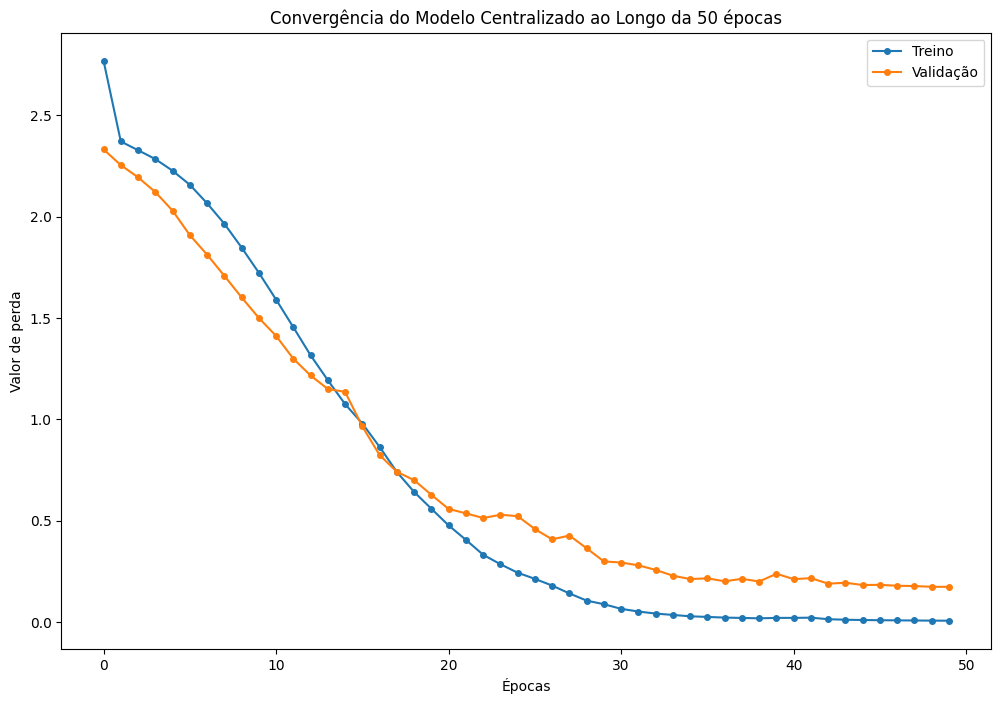

In [74]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
rounds = np.arange(1, epochs+ 1)
ax.plot(train_losses, marker='o', linestyle='-', markersize=4, label=f'Treino')
ax.plot(val_losses, marker='o', linestyle='-', markersize=4, label=f'Validação')

ax.set_title("Convergência do Modelo Centralizado ao Longo da 50 épocas")
ax.set_ylabel("Valor de perda")
ax.set_xlabel("Épocas")
ax.legend()

In [70]:
hits

[np.float64(0.998991935483871)]

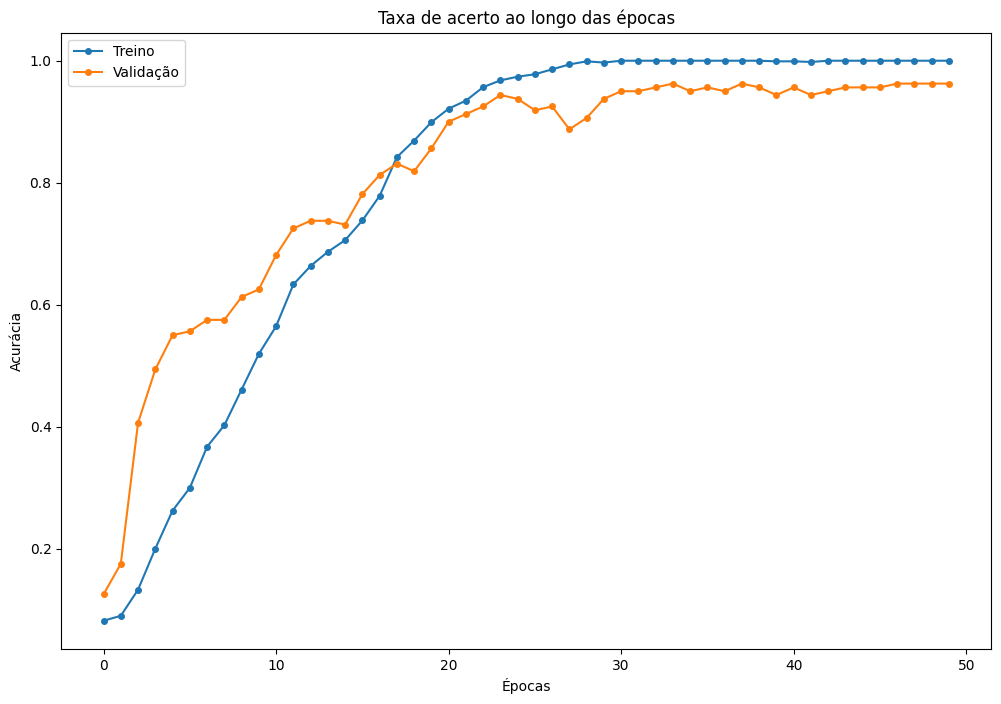

In [75]:
fig, ax = plt.subplots(figsize=(12, 8))
rounds = np.arange(1, epochs+ 1)
ax.plot(train_accuracy, marker='o', linestyle='-', markersize=4, label=f'Treino')
ax.plot(val_accuracy, marker='o', linestyle='-', markersize=4, label=f'Validação')

ax.set_title("Taxa de acerto ao longo das épocas")
ax.set_ylabel("Acurácia")
ax.set_xlabel("Épocas")
ax.legend()

In [48]:
score = []
with torch.no_grad():
    net.eval()
    for x, y in testloader:
        x, y = x.to(device).float(), y.to(device).long().squeeze()
        output = net(x)
        score.append(len(torch.where(torch.argmax(output, dim=1) == y)[0]) / len(output))

In [50]:
np.mean(score)

np.float64(0.7234375)